### CNN model for CIFAR10 without Transfer Learning

CIFAR is an acronym that stands for the Canadian Institute For Advanced Research and the CIFAR-10 dataset was developed along with the CIFAR-100 dataset by researchers at the CIFAR institute.

The dataset is comprised of 60,000 32×32 pixel color photographs of objects from 10 classes, such as frogs, birds, cats, ships, etc. The class labels and their standard associated integer values are listed below.

https://machinelearningmastery.com/how-to-develop-a-cnn-from-scratch-for-cifar-10-photo-classification/

170500096/170498071 [==============================] - 4s 0us/step
Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


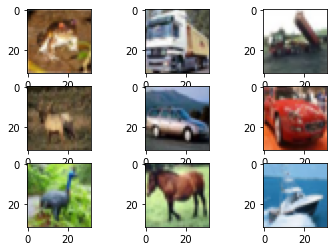

In [ ]:
# example of loading the cifar10 dataset
from matplotlib import pyplot
from keras.datasets import cifar10
# load dataset
(trainX, trainy), (testX, testy) = cifar10.load_data()
# summarize loaded dataset
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))
# plot first few images
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# plot raw pixel data
	pyplot.imshow(trainX[i])
# show the figure
pyplot.show()

In [ ]:
trainX[1] , type(trainX[1])

(array([[[154, 177, 187],
         [126, 137, 136],
         [105, 104,  95],
         ...,
         [ 91,  95,  71],
         [ 87,  90,  71],
         [ 79,  81,  70]],
 
        [[140, 160, 169],
         [145, 153, 154],
         [125, 125, 118],
         ...,
         [ 96,  99,  78],
         [ 77,  80,  62],
         [ 71,  73,  61]],
 
        [[140, 155, 164],
         [139, 146, 149],
         [115, 115, 112],
         ...,
         [ 79,  82,  64],
         [ 68,  70,  55],
         [ 67,  69,  55]],
 
        ...,
 
        [[175, 167, 166],
         [156, 154, 160],
         [154, 160, 170],
         ...,
         [ 42,  34,  36],
         [ 61,  53,  57],
         [ 93,  83,  91]],
 
        [[165, 154, 128],
         [156, 152, 130],
         [159, 161, 142],
         ...,
         [103,  93,  96],
         [123, 114, 120],
         [131, 121, 131]],
 
        [[163, 148, 120],
         [158, 148, 122],
         [163, 156, 133],
         ...,
         [143, 133, 139],
  

We will follow below Life Cycle 

1. Load Dataset 
2. Preparation of Dataset
3. Model Defination
4. Model Evaluation
5. Results

### 1. Load Dataset

In [ ]:
# load train and test dataset
def load_dataset():
	# load dataset
	(trainX, trainY), (testX, testY) = cifar10.load_data()
	# one hot encode target values
	trainY = to_categorical(trainY)
	testY = to_categorical(testY)
	return trainX, trainY, testX, testY

### 2. Dataset Preparation

In [ ]:
# scale pixels
def prep_pixels(train, test):
	# convert from integers to floats
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
	# normalize to range 0-1
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	# return normalized images
	return train_norm, test_norm

### 3. Defining Model --- Baseline Model without using any transfer learning Techniques

In [ ]:
# define cnn model
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(10, activation='softmax'))
	# compile model
	opt = SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model

### 4.Train and Evaluate Model

We will directly call these in Main Function

### 5. Visualize Results

In [ ]:
# plot diagnostic learning curves
def summarize_diagnostics(history):
	# plot loss
	pyplot.subplot(211)
	pyplot.title('Cross Entropy Loss')
	pyplot.plot(history.history['loss'], color='blue', label='train')
	pyplot.plot(history.history['val_loss'], color='orange', label='test')
	# plot accuracy
	pyplot.subplot(212)
	pyplot.title('Classification Accuracy')
	pyplot.plot(history.history['accuracy'], color='blue', label='train')
	pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
	# save plot to file
	filename = sys.argv[0].split('/')[-1]
	pyplot.savefig(filename + '_plot.png')
	pyplot.close()

### Final Function which will call all above Functions

In [ ]:
# run the test harness for evaluating a model
def run_test_harness():
	# load dataset
	trainX, trainY, testX, testY = load_dataset()
	# prepare pixel data
	trainX, testX = prep_pixels(trainX, testX)
	# define model
	model = define_model()
	# fit model
	history = model.fit(trainX, trainY, epochs=100, batch_size=64, validation_data=(testX, testY))
	# evaluate model
	_, acc = model.evaluate(testX, testY, verbose=0)
	print('> %.3f' % (acc * 100.0))
	# learning curves
	summarize_diagnostics(history)

In [ ]:
import sys
from matplotlib import pyplot
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.optimizers import SGD

run_test_harness()

Epoch 1/100
782/782 [==============================] - 4s 5ms/step - loss: 1.9207 - accuracy: 0.3113 - val_loss: 1.4966 - val_accuracy: 0.4567
Epoch 2/100
782/782 [==============================] - 4s 5ms/step - loss: 1.4586 - accuracy: 0.4836 - val_loss: 1.3183 - val_accuracy: 0.5260
Epoch 3/100
782/782 [==============================] - 4s 5ms/step - loss: 1.2759 - accuracy: 0.5510 - val_loss: 1.2275 - val_accuracy: 0.5669
Epoch 4/100
782/782 [==============================] - 4s 5ms/step - loss: 1.1688 - accuracy: 0.5859 - val_loss: 1.1680 - val_accuracy: 0.5847
Epoch 5/100
782/782 [==============================] - 4s 5ms/step - loss: 1.0818 - accuracy: 0.6232 - val_loss: 1.1023 - val_accuracy: 0.6086
Epoch 6/100
782/782 [==============================] - 4s 5ms/step - loss: 0.9997 - accuracy: 0.6503 - val_loss: 1.0596 - val_accuracy: 0.6291
Epoch 7/100
782/782 [==============================] - 4s 5ms/step - loss: 0.9407 - accuracy: 0.6723 - val_loss: 1.0403 - val_accuracy: 0.6338

### Dropout and Data Augmentation and Batch Normalization

In [ ]:
# baseline model with dropout and data augmentation on the cifar10 dataset
import sys
from matplotlib import pyplot
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dropout
from keras.layers import BatchNormalization


# define cnn model
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
	model.add(BatchNormalization())
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.2))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.3))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.4))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(BatchNormalization())
	model.add(Dropout(0.5))
	model.add(Dense(10, activation='softmax'))
	# compile model
	opt = SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model

# run the test harness for evaluating a model
def run_test_harness():
	# load dataset
	trainX, trainY, testX, testY = load_dataset()
	# prepare pixel data
	trainX, testX = prep_pixels(trainX, testX)
	# define model
	model = define_model()
	# create data generator
	datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
	# prepare iterator
	it_train = datagen.flow(trainX, trainY, batch_size=64)
	# fit model
	steps = int(trainX.shape[0] / 64)
	history = model.fit_generator(it_train, steps_per_epoch=steps, epochs=100, validation_data=(testX, testY))
	# evaluate model
	_, acc = model.evaluate(testX, testY)
	print('> %.3f' % (acc * 100.0))
	# learning curves
	summarize_diagnostics(history)
 
# entry point, run the test harness
run_test_harness()

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
781/781 [==============================] - 26s 31ms/step - loss: 2.5341 - accuracy: 0.2423 - val_loss: 1.4415 - val_accuracy: 0.4690
Epoch 2/100
781/781 [==============================] - 24s 31ms/step - loss: 1.6730 - accuracy: 0.3878 - val_loss: 1.4719 - val_accuracy: 0.4500
Epoch 3/100
781/781 [==============================] - 24s 31ms/step - loss: 1.5071 - accuracy: 0.4469 - val_loss: 1.3824 - val_accuracy: 0.4906
Epoch 4/100
781/781 [==============================] - 24s 30ms/step - loss: 1.4316 - accuracy: 0.4764 - val_loss: 1.4322 - val_accuracy: 0.4746
Epoch 5/100
781/781 [==============================] - 24s 31ms/step - loss: 1.3642 - accuracy: 0.5018 - val_loss: 1.3716 - val_accuracy: 0.5045
Epoch 6/100
781/781 [==============================] - 24s 31ms/step - loss: 1.3223 - accuracy: 0.5220 - val_loss: 1.3528 - val_accuracy: 0.5231
Epoch 7/100
781/781 [==============================] - 24s 30ms/step - loss: 1.2651 - accuracy: 0.5440 - val_loss: 1.2145 - val_ac

### Using Transfer Learning

In [2]:
import tensorflow as tf
import tensorflow.keras as K
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


def preprocess_data(X, Y):
    """
    function that pre-processes the CIFAR10 dataset as per
    densenet model requirements for input images
    labels are one-hot encoded
    """
    X = K.applications.densenet.preprocess_input(X)
    Y = K.utils.to_categorical(Y)
    return X, Y

# load the Cifar10 dataset, 50,000 training images and 10,000 test images (here used as validation data)
(x_train, y_train), (x_test, y_test) = K.datasets.cifar10.load_data()
# preprocess the data using the application's preprocess_input method and convert the labels to one-hot encodings
x_train, y_train = preprocess_data(x_train, y_train)
x_test, y_test = preprocess_data(x_test, y_test)

x_train.shape , y_train.shape , x_test.shape , y_test.shape

170500096/170498071 [==============================] - 2s 0us/step


((50000, 32, 32, 3), (50000, 10), (10000, 32, 32, 3), (10000, 10))

### DenseNet Transfer Learning Model

In [3]:
# weights are initialized as per the he et al. method
initializer = K.initializers.he_normal()
input_tensor = K.Input(shape=(32, 32, 3))
# resize images to the image size upon which the network was pre-trained
resized_images = K.layers.Lambda(lambda image: tf.image.resize(image, (224, 224)))(input_tensor)

resized_images.shape

TensorShape([None, 224, 224, 3])

In [4]:

model = K.applications.DenseNet201(include_top=False,
                                   weights='imagenet',
                                   input_tensor=resized_images,
                                   input_shape=(224, 224, 3),
                                   pooling='max',
                                   classes=1000)
# make the weights and biases of the base model non-trainable by "freezing" each layer of the DenseNet201 network
for layer in model.layers:
    layer.trainable = False


output = model.layers[-1].output
# reshape the output feature map of the base model before passing the data on to the Dense layers of the classifier head
flatten = K.layers.Flatten()
output = flatten(output)
layer_256 = K.layers.Dense(units=256,
                           activation='elu',
                           kernel_initializer=initializer,
                           kernel_regularizer=K.regularizers.l2())
output = layer_256(output)
dropout = K.layers.Dropout(0.5)
output = dropout(output)
softmax = K.layers.Dense(units=10,
                         activation='softmax',
                         kernel_initializer=initializer,
                         kernel_regularizer=K.regularizers.l2())
output = softmax(output)
model = K.models.Model(inputs=input_tensor, outputs=output)

model.summary()

74842112/74836368 [==============================] - 0s 0us/step
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
lambda (Lambda)                 (None, 224, 224, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0           lambda[0][0]                     
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 112, 112, 64) 9408        zero_padding2d[0][0]             
_____________________________

In [5]:
model.compile(
         optimizer=K.optimizers.Adam(learning_rate=1e-4),
         loss='categorical_crossentropy',
         metrics=['accuracy'])

In [6]:
### Call back functions to be used while training 

# reduce learning rate when val_accuracy has stopped improving
lr_reduce = K.callbacks.ReduceLROnPlateau(monitor='val_accuracy',
                                          factor=0.6,
                                          patience=2,
                                          verbose=1,
                                          mode='max',
                                          min_lr=1e-7)
# stop training when val_accuracy has stopped improving
early_stop = K.callbacks.EarlyStopping(monitor='val_accuracy',
                                       patience=3,
                                       verbose=1,
                                       mode='max')
# callback to save the Keras model and (best) weights obtained on an epoch basis. here, the trained (compiled) model is saved in the current working directory as 'cifar10.h5'
checkpoint = K.callbacks.ModelCheckpoint('cifar10.h5',
                                         monitor='val_accuracy',
                                         verbose=1,
                                         save_weights_only=False,
                                         save_best_only=True,
                                         mode='max',
                                         save_freq='epoch')

In [7]:
x_train.shape

(50000, 32, 32, 3)

In [23]:
### Training
train_datagen = K.preprocessing.image.ImageDataGenerator(horizontal_flip=True)
train_generator = train_datagen.flow(x_train,y_train,batch_size=32)
val_datagen = K.preprocessing.image.ImageDataGenerator(horizontal_flip=True)
val_generator = val_datagen.flow(x_test,y_test,batch_size=32)
train_steps_per_epoch = x_train.shape[0] // 32
val_steps_per_epoch = x_test.shape[0] // 32
history = model.fit(train_generator,
                    steps_per_epoch=train_steps_per_epoch,
                    validation_data=val_generator,
                    validation_steps=val_steps_per_epoch,
                    epochs=20,
                    shuffle=True,
                    callbacks=[lr_reduce, early_stop, checkpoint],
                    verbose=1)

Epoch 1/20
1562/1562 [==============================] - 281s 170ms/step - loss: 5.0232 - accuracy: 0.5892 - val_loss: 2.2594 - val_accuracy: 0.8632

Epoch 00001: val_accuracy improved from -inf to 0.86318, saving model to cifar10.h5
Epoch 2/20
1562/1562 [==============================] - 265s 170ms/step - loss: 2.2264 - accuracy: 0.8329 - val_loss: 1.6771 - val_accuracy: 0.8793

Epoch 00002: val_accuracy improved from 0.86318 to 0.87931, saving model to cifar10.h5
Epoch 3/20
1562/1562 [==============================] - 265s 170ms/step - loss: 1.6284 - accuracy: 0.8641 - val_loss: 1.2511 - val_accuracy: 0.8890

Epoch 00003: val_accuracy improved from 0.87931 to 0.88902, saving model to cifar10.h5
Epoch 4/20
1562/1562 [==============================] - 265s 170ms/step - loss: 1.2071 - accuracy: 0.8816 - val_loss: 0.9617 - val_accuracy: 0.8918

Epoch 00004: val_accuracy improved from 0.88902 to 0.89183, saving model to cifar10.h5
Epoch 5/20
1562/1562 [==============================] - 265

In [ ]:
plt.figure(1, figsize = (15,8))
plt.subplot(221)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'])
plt.subplot(222)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'])
plt.show()

### VGG19 Transfer Learning Model

In [1]:
import tensorflow as tf
import tensorflow.keras as K
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


def preprocess_data(X, Y):
    """
    function that pre-processes the CIFAR10 dataset as per
    densenet model requirements for input images
    labels are one-hot encoded
    """
    X = K.applications.vgg19.preprocess_input(X)
    Y = K.utils.to_categorical(Y)
    return X, Y

# load the Cifar10 dataset, 50,000 training images and 10,000 test images (here used as validation data)
(x_train, y_train), (x_test, y_test) = K.datasets.cifar10.load_data()
# preprocess the data using the application's preprocess_input method and convert the labels to one-hot encodings
x_train, y_train = preprocess_data(x_train, y_train)
x_test, y_test = preprocess_data(x_test, y_test)

#x_train.shape , y_train.shape , x_test.shape , y_test.shape



# weights are initialized as per the he et al. method
initializer = K.initializers.he_normal()
input_tensor = K.Input(shape=(32, 32, 3))
# resize images to the image size upon which the network was pre-trained
resized_images = K.layers.Lambda(lambda image: tf.image.resize(image, (224, 224)))(input_tensor)

#print(resized_images.shape)

model = K.applications.VGG19(include_top=False,
                                   weights='imagenet',
                                   input_tensor=resized_images,
                                   input_shape=(224, 224, 3),
                                   pooling='max',
                                   classes=1000)
# make the weights and biases of the base model non-trainable by "freezing" each layer of the DenseNet201 network
for layer in model.layers:
    layer.trainable = False


output = model.layers[-1].output
# reshape the output feature map of the base model before passing the data on to the Dense layers of the classifier head
flatten = K.layers.Flatten()
output = flatten(output)
layer_256 = K.layers.Dense(units=256,
                           activation='elu',
                           kernel_initializer=initializer,
                           kernel_regularizer=K.regularizers.l2())
output = layer_256(output)
dropout = K.layers.Dropout(0.5)
output = dropout(output)
softmax = K.layers.Dense(units=10,
                         activation='softmax',
                         kernel_initializer=initializer,
                         kernel_regularizer=K.regularizers.l2())
output = softmax(output)
model = K.models.Model(inputs=input_tensor, outputs=output)

model.summary()

80142336/80134624 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
lambda (Lambda)              (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
______________________________________________________________

In [2]:
model.compile(
         optimizer=K.optimizers.Adam(learning_rate=1e-4),
         loss='categorical_crossentropy',
         metrics=['accuracy'])

### Call back functions to be used while training 

# reduce learning rate when val_accuracy has stopped improving
lr_reduce = K.callbacks.ReduceLROnPlateau(monitor='val_accuracy',
                                          factor=0.6,
                                          patience=2,
                                          verbose=1,
                                          mode='max',
                                          min_lr=1e-7)
# stop training when val_accuracy has stopped improving
early_stop = K.callbacks.EarlyStopping(monitor='val_accuracy',
                                       patience=3,
                                       verbose=1,
                                       mode='max')
# callback to save the Keras model and (best) weights obtained on an epoch basis. here, the trained (compiled) model is saved in the current working directory as 'cifar10.h5'
checkpoint = K.callbacks.ModelCheckpoint('cifar10_VGG19.h5',
                                         monitor='val_accuracy',
                                         verbose=1,
                                         save_weights_only=False,
                                         save_best_only=True,
                                         mode='max',
                                         save_freq='epoch')
### Training
train_datagen = K.preprocessing.image.ImageDataGenerator(horizontal_flip=True)
train_generator = train_datagen.flow(x_train,y_train,batch_size=32)
val_datagen = K.preprocessing.image.ImageDataGenerator(horizontal_flip=True)
val_generator = val_datagen.flow(x_test,y_test,batch_size=32)
train_steps_per_epoch = x_train.shape[0] // 32
val_steps_per_epoch = x_test.shape[0] // 32
history = model.fit(train_generator,
                    steps_per_epoch=train_steps_per_epoch,
                    validation_data=val_generator,
                    validation_steps=val_steps_per_epoch,
                    epochs=10,
                    shuffle=True,
                    callbacks=[lr_reduce, early_stop, checkpoint],
                    verbose=1)

Epoch 1/10
1562/1562 [==============================] - 291s 181ms/step - loss: 18.4127 - accuracy: 0.3043 - val_loss: 6.3154 - val_accuracy: 0.5814

Epoch 00001: val_accuracy improved from -inf to 0.58143, saving model to cifar10_VGG19.h5
Epoch 2/10
1562/1562 [==============================] - 283s 181ms/step - loss: 6.8445 - accuracy: 0.4604 - val_loss: 5.3496 - val_accuracy: 0.6949

Epoch 00002: val_accuracy improved from 0.58143 to 0.69491, saving model to cifar10_VGG19.h5
Epoch 3/10
1562/1562 [==============================] - 284s 182ms/step - loss: 5.6767 - accuracy: 0.5704 - val_loss: 4.3561 - val_accuracy: 0.7448

Epoch 00003: val_accuracy improved from 0.69491 to 0.74479, saving model to cifar10_VGG19.h5
Epoch 4/10
1562/1562 [==============================] - 284s 182ms/step - loss: 4.5390 - accuracy: 0.6323 - val_loss: 3.3608 - val_accuracy: 0.7733

Epoch 00004: val_accuracy improved from 0.74479 to 0.77334, saving model to cifar10_VGG19.h5
Epoch 5/10
1562/1562 [============

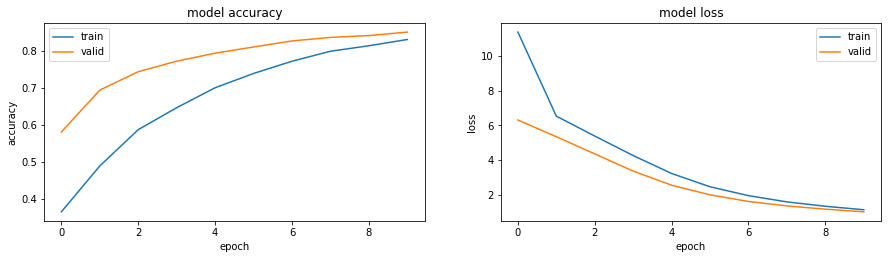

In [3]:
plt.figure(1, figsize = (15,8))
plt.subplot(221)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'])
plt.subplot(222)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'])
plt.show()

### RESNET 152 v2 Transfer Learning Model

In [4]:
def preprocess_data(X, Y):
    """
    function that pre-processes the CIFAR10 dataset as per
    densenet model requirements for input images
    labels are one-hot encoded
    """
    X = K.applications.resnet_v2.preprocess_input(X)
    Y = K.utils.to_categorical(Y)
    return X, Y

# load the Cifar10 dataset, 50,000 training images and 10,000 test images (here used as validation data)
(x_train, y_train), (x_test, y_test) = K.datasets.cifar10.load_data()
# preprocess the data using the application's preprocess_input method and convert the labels to one-hot encodings
x_train, y_train = preprocess_data(x_train, y_train)
x_test, y_test = preprocess_data(x_test, y_test)

#x_train.shape , y_train.shape , x_test.shape , y_test.shape



# weights are initialized as per the he et al. method
initializer = K.initializers.he_normal()
input_tensor = K.Input(shape=(32, 32, 3))
# resize images to the image size upon which the network was pre-trained
resized_images = K.layers.Lambda(lambda image: tf.image.resize(image, (224, 224)))(input_tensor)

#print(resized_images.shape)

model = K.applications.ResNet152V2(include_top=False,
                                   weights='imagenet',
                                   input_tensor=resized_images,
                                   input_shape=(224, 224, 3),
                                   pooling='max',
                                   classes=1000)
# make the weights and biases of the base model non-trainable by "freezing" each layer of the DenseNet201 network
for layer in model.layers:
    layer.trainable = False


output = model.layers[-1].output
# reshape the output feature map of the base model before passing the data on to the Dense layers of the classifier head
flatten = K.layers.Flatten()
output = flatten(output)
layer_256 = K.layers.Dense(units=256,
                           activation='elu',
                           kernel_initializer=initializer,
                           kernel_regularizer=K.regularizers.l2())
output = layer_256(output)
dropout = K.layers.Dropout(0.5)
output = dropout(output)
softmax = K.layers.Dense(units=10,
                         activation='softmax',
                         kernel_initializer=initializer,
                         kernel_regularizer=K.regularizers.l2())
output = softmax(output)
model = K.models.Model(inputs=input_tensor, outputs=output)

model.summary()

234553344/234545216 [==============================] - 1s 0us/step
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
lambda_1 (Lambda)               (None, 224, 224, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           lambda_1[0][0]                   
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
_________________________

In [5]:
model.compile(
         optimizer=K.optimizers.Adam(learning_rate=1e-4),
         loss='categorical_crossentropy',
         metrics=['accuracy'])

### Call back functions to be used while training 

# reduce learning rate when val_accuracy has stopped improving
lr_reduce = K.callbacks.ReduceLROnPlateau(monitor='val_accuracy',
                                          factor=0.6,
                                          patience=2,
                                          verbose=1,
                                          mode='max',
                                          min_lr=1e-7)
# stop training when val_accuracy has stopped improving
early_stop = K.callbacks.EarlyStopping(monitor='val_accuracy',
                                       patience=3,
                                       verbose=1,
                                       mode='max')
# callback to save the Keras model and (best) weights obtained on an epoch basis. here, the trained (compiled) model is saved in the current working directory as 'cifar10.h5'
checkpoint = K.callbacks.ModelCheckpoint('cifar10_Resnet_152V2.h5',
                                         monitor='val_accuracy',
                                         verbose=1,
                                         save_weights_only=False,
                                         save_best_only=True,
                                         mode='max',
                                         save_freq='epoch')
### Training
train_datagen = K.preprocessing.image.ImageDataGenerator(horizontal_flip=True)
train_generator = train_datagen.flow(x_train,y_train,batch_size=32)
val_datagen = K.preprocessing.image.ImageDataGenerator(horizontal_flip=True)
val_generator = val_datagen.flow(x_test,y_test,batch_size=32)
train_steps_per_epoch = x_train.shape[0] // 32
val_steps_per_epoch = x_test.shape[0] // 32
history = model.fit(train_generator,
                    steps_per_epoch=train_steps_per_epoch,
                    validation_data=val_generator,
                    validation_steps=val_steps_per_epoch,
                    epochs=10,
                    shuffle=True,
                    callbacks=[lr_reduce, early_stop, checkpoint],
                    verbose=1)

Epoch 1/10
1562/1562 [==============================] - 443s 279ms/step - loss: 7.8927 - accuracy: 0.5844 - val_loss: 4.1834 - val_accuracy: 0.8501

Epoch 00001: val_accuracy improved from -inf to 0.85006, saving model to cifar10_Resnet_152V2.h5
Epoch 2/10
1562/1562 [==============================] - 433s 277ms/step - loss: 4.0954 - accuracy: 0.7993 - val_loss: 2.9893 - val_accuracy: 0.8721

Epoch 00002: val_accuracy improved from 0.85006 to 0.87210, saving model to cifar10_Resnet_152V2.h5
Epoch 3/10
1562/1562 [==============================] - 433s 277ms/step - loss: 2.8612 - accuracy: 0.8447 - val_loss: 2.0855 - val_accuracy: 0.8830

Epoch 00003: val_accuracy improved from 0.87210 to 0.88301, saving model to cifar10_Resnet_152V2.h5
Epoch 4/10
1562/1562 [==============================] - 433s 277ms/step - loss: 1.9927 - accuracy: 0.8617 - val_loss: 1.4909 - val_accuracy: 0.8854

Epoch 00004: val_accuracy improved from 0.88301 to 0.88542, saving model to cifar10_Resnet_152V2.h5
Epoch 5

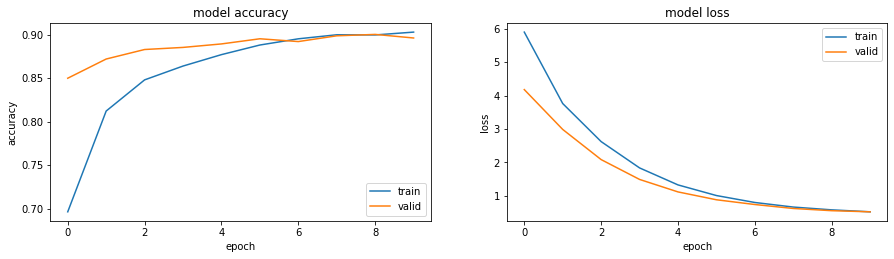

In [6]:
plt.figure(1, figsize = (15,8))
plt.subplot(221)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'])
plt.subplot(222)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'])
plt.show()

### Inception V3

In [7]:
def preprocess_data(X, Y):
    """
    function that pre-processes the CIFAR10 dataset as per
    densenet model requirements for input images
    labels are one-hot encoded
    """
    X = K.applications.inception_v3.preprocess_input(X)
    Y = K.utils.to_categorical(Y)
    return X, Y

# load the Cifar10 dataset, 50,000 training images and 10,000 test images (here used as validation data)
(x_train, y_train), (x_test, y_test) = K.datasets.cifar10.load_data()
# preprocess the data using the application's preprocess_input method and convert the labels to one-hot encodings
x_train, y_train = preprocess_data(x_train, y_train)
x_test, y_test = preprocess_data(x_test, y_test)

#x_train.shape , y_train.shape , x_test.shape , y_test.shape



# weights are initialized as per the he et al. method
initializer = K.initializers.he_normal()
input_tensor = K.Input(shape=(32, 32, 3))
# resize images to the image size upon which the network was pre-trained
resized_images = K.layers.Lambda(lambda image: tf.image.resize(image, (299, 299)))(input_tensor)

#print(resized_images.shape)

model = K.applications.InceptionV3(include_top=False,
                                   weights='imagenet',
                                   input_tensor=resized_images,
                                   input_shape=(299, 299, 3),
                                   pooling='max',
                                   classes=1000)
# make the weights and biases of the base model non-trainable by "freezing" each layer of the DenseNet201 network
for layer in model.layers:
    layer.trainable = False


output = model.layers[-1].output
# reshape the output feature map of the base model before passing the data on to the Dense layers of the classifier head
flatten = K.layers.Flatten()
output = flatten(output)
layer_256 = K.layers.Dense(units=256,
                           activation='elu',
                           kernel_initializer=initializer,
                           kernel_regularizer=K.regularizers.l2())
output = layer_256(output)
dropout = K.layers.Dropout(0.5)
output = dropout(output)
softmax = K.layers.Dense(units=10,
                         activation='softmax',
                         kernel_initializer=initializer,
                         kernel_regularizer=K.regularizers.l2())
output = softmax(output)
model = K.models.Model(inputs=input_tensor, outputs=output)

model.summary()

87916544/87910968 [==============================] - 0s 0us/step
Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
lambda_2 (Lambda)               (None, 299, 299, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 149, 149, 32) 864         lambda_2[0][0]                   
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 149, 149, 32) 96          conv2d[0][0]                     
___________________________

In [8]:
model.compile(
         optimizer=K.optimizers.Adam(learning_rate=1e-4),
         loss='categorical_crossentropy',
         metrics=['accuracy'])

### Call back functions to be used while training 

# reduce learning rate when val_accuracy has stopped improving
lr_reduce = K.callbacks.ReduceLROnPlateau(monitor='val_accuracy',
                                          factor=0.6,
                                          patience=2,
                                          verbose=1,
                                          mode='max',
                                          min_lr=1e-7)
# stop training when val_accuracy has stopped improving
early_stop = K.callbacks.EarlyStopping(monitor='val_accuracy',
                                       patience=3,
                                       verbose=1,
                                       mode='max')
# callback to save the Keras model and (best) weights obtained on an epoch basis. here, the trained (compiled) model is saved in the current working directory as 'cifar10.h5'
checkpoint = K.callbacks.ModelCheckpoint('cifar10_InceptionV3.h5',
                                         monitor='val_accuracy',
                                         verbose=1,
                                         save_weights_only=False,
                                         save_best_only=True,
                                         mode='max',
                                         save_freq='epoch')
### Training
train_datagen = K.preprocessing.image.ImageDataGenerator(horizontal_flip=True)
train_generator = train_datagen.flow(x_train,y_train,batch_size=32)
val_datagen = K.preprocessing.image.ImageDataGenerator(horizontal_flip=True)
val_generator = val_datagen.flow(x_test,y_test,batch_size=32)
train_steps_per_epoch = x_train.shape[0] // 32
val_steps_per_epoch = x_test.shape[0] // 32
history = model.fit(train_generator,
                    steps_per_epoch=train_steps_per_epoch,
                    validation_data=val_generator,
                    validation_steps=val_steps_per_epoch,
                    epochs=10,
                    shuffle=True,
                    callbacks=[lr_reduce, early_stop, checkpoint],
                    verbose=1)

Epoch 1/10
1562/1562 [==============================] - 231s 145ms/step - loss: 6.3749 - accuracy: 0.5888 - val_loss: 4.0211 - val_accuracy: 0.8280

Epoch 00001: val_accuracy improved from -inf to 0.82802, saving model to cifar10_InceptionV3.h5
Epoch 2/10
1562/1562 [==============================] - 225s 144ms/step - loss: 3.8312 - accuracy: 0.7925 - val_loss: 2.7592 - val_accuracy: 0.8403

Epoch 00002: val_accuracy improved from 0.82802 to 0.84034, saving model to cifar10_InceptionV3.h5
Epoch 3/10
1562/1562 [==============================] - 226s 144ms/step - loss: 2.6045 - accuracy: 0.8195 - val_loss: 1.9525 - val_accuracy: 0.8395

Epoch 00003: val_accuracy did not improve from 0.84034
Epoch 4/10
1562/1562 [==============================] - 226s 144ms/step - loss: 1.8123 - accuracy: 0.8345 - val_loss: 1.3878 - val_accuracy: 0.8552

Epoch 00004: val_accuracy improved from 0.84034 to 0.85517, saving model to cifar10_InceptionV3.h5
Epoch 5/10
1562/1562 [==============================] -

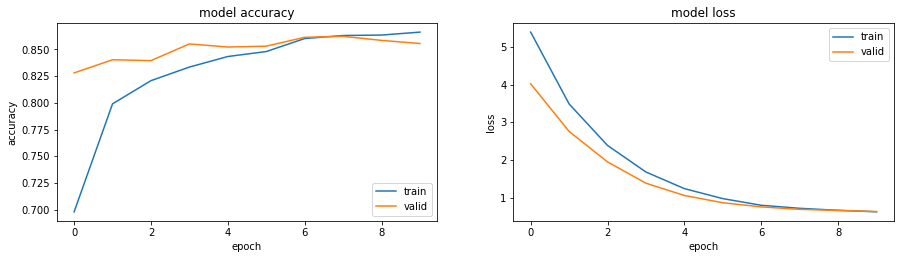

In [9]:
plt.figure(1, figsize = (15,8))
plt.subplot(221)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'])
plt.subplot(222)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'])
plt.show()

### Xception Transfer Learning Model

In [10]:
def preprocess_data(X, Y):
    """
    function that pre-processes the CIFAR10 dataset as per
    densenet model requirements for input images
    labels are one-hot encoded
    """
    X = K.applications.xception.preprocess_input(X)
    Y = K.utils.to_categorical(Y)
    return X, Y

# load the Cifar10 dataset, 50,000 training images and 10,000 test images (here used as validation data)
(x_train, y_train), (x_test, y_test) = K.datasets.cifar10.load_data()
# preprocess the data using the application's preprocess_input method and convert the labels to one-hot encodings
x_train, y_train = preprocess_data(x_train, y_train)
x_test, y_test = preprocess_data(x_test, y_test)

#x_train.shape , y_train.shape , x_test.shape , y_test.shape



# weights are initialized as per the he et al. method
initializer = K.initializers.he_normal()
input_tensor = K.Input(shape=(32, 32, 3))
# resize images to the image size upon which the network was pre-trained
resized_images = K.layers.Lambda(lambda image: tf.image.resize(image, (299, 299)))(input_tensor)

#print(resized_images.shape)

model = K.applications.Xception(include_top=False,
                                   weights='imagenet',
                                   input_tensor=resized_images,
                                   input_shape=(299, 299, 3),
                                   pooling='max',
                                   classes=1000)
# make the weights and biases of the base model non-trainable by "freezing" each layer of the DenseNet201 network
for layer in model.layers:
    layer.trainable = False


output = model.layers[-1].output
# reshape the output feature map of the base model before passing the data on to the Dense layers of the classifier head
flatten = K.layers.Flatten()
output = flatten(output)
layer_256 = K.layers.Dense(units=256,
                           activation='elu',
                           kernel_initializer=initializer,
                           kernel_regularizer=K.regularizers.l2())
output = layer_256(output)
dropout = K.layers.Dropout(0.5)
output = dropout(output)
softmax = K.layers.Dense(units=10,
                         activation='softmax',
                         kernel_initializer=initializer,
                         kernel_regularizer=K.regularizers.l2())
output = softmax(output)
model = K.models.Model(inputs=input_tensor, outputs=output)

model.summary()

83689472/83683744 [==============================] - 0s 0us/step
Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
lambda_3 (Lambda)               (None, 299, 299, 3)  0           input_4[0][0]                    
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 149, 149, 32) 864         lambda_3[0][0]                   
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 149, 149, 32) 128         block1_conv1[0][0]               
___________________________

In [11]:
model.compile(
         optimizer=K.optimizers.Adam(learning_rate=1e-4),
         loss='categorical_crossentropy',
         metrics=['accuracy'])

### Call back functions to be used while training 

# reduce learning rate when val_accuracy has stopped improving
lr_reduce = K.callbacks.ReduceLROnPlateau(monitor='val_accuracy',
                                          factor=0.6,
                                          patience=2,
                                          verbose=1,
                                          mode='max',
                                          min_lr=1e-7)
# stop training when val_accuracy has stopped improving
early_stop = K.callbacks.EarlyStopping(monitor='val_accuracy',
                                       patience=3,
                                       verbose=1,
                                       mode='max')
# callback to save the Keras model and (best) weights obtained on an epoch basis. here, the trained (compiled) model is saved in the current working directory as 'cifar10.h5'
checkpoint = K.callbacks.ModelCheckpoint('cifar10_Exception.h5',
                                         monitor='val_accuracy',
                                         verbose=1,
                                         save_weights_only=False,
                                         save_best_only=True,
                                         mode='max',
                                         save_freq='epoch')
### Training
train_datagen = K.preprocessing.image.ImageDataGenerator(horizontal_flip=True)
train_generator = train_datagen.flow(x_train,y_train,batch_size=32)
val_datagen = K.preprocessing.image.ImageDataGenerator(horizontal_flip=True)
val_generator = val_datagen.flow(x_test,y_test,batch_size=32)
train_steps_per_epoch = x_train.shape[0] // 32
val_steps_per_epoch = x_test.shape[0] // 32
history = model.fit(train_generator,
                    steps_per_epoch=train_steps_per_epoch,
                    validation_data=val_generator,
                    validation_steps=val_steps_per_epoch,
                    epochs=10,
                    shuffle=True,
                    callbacks=[lr_reduce, early_stop, checkpoint],
                    verbose=1)

Epoch 1/10
1562/1562 [==============================] - 491s 313ms/step - loss: 5.7269 - accuracy: 0.7041 - val_loss: 3.3807 - val_accuracy: 0.8636

Epoch 00001: val_accuracy improved from -inf to 0.86358, saving model to cifar10_Exception.h5
Epoch 2/10
1562/1562 [==============================] - 487s 312ms/step - loss: 2.9956 - accuracy: 0.8495 - val_loss: 1.8895 - val_accuracy: 0.8727

Epoch 00002: val_accuracy improved from 0.86358 to 0.87270, saving model to cifar10_Exception.h5
Epoch 3/10
1562/1562 [==============================] - 488s 312ms/step - loss: 1.6909 - accuracy: 0.8691 - val_loss: 1.1694 - val_accuracy: 0.8743

Epoch 00003: val_accuracy improved from 0.87270 to 0.87430, saving model to cifar10_Exception.h5
Epoch 4/10
1562/1562 [==============================] - 487s 312ms/step - loss: 1.0577 - accuracy: 0.8744 - val_loss: 0.8116 - val_accuracy: 0.8761

Epoch 00004: val_accuracy improved from 0.87430 to 0.87610, saving model to cifar10_Exception.h5
Epoch 5/10
1562/156

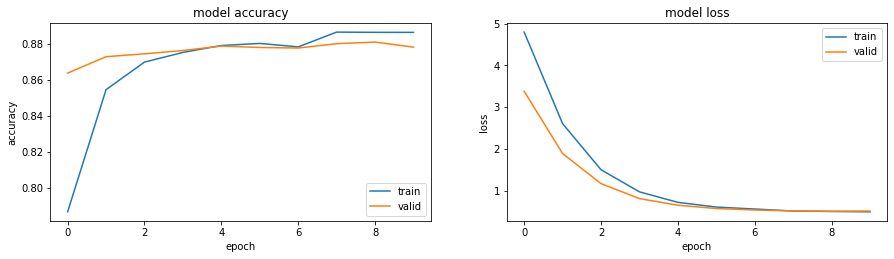

In [12]:
plt.figure(1, figsize = (15,8))
plt.subplot(221)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'])
plt.subplot(222)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'])
plt.show()